In [2]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
dataset_url = "/content/drive/MyDrive/fruits-360_dataset/fruits-360/Training"

img_height= 100
img_width = 100
batch_size = 32

Split training set 80/20 into training and validation set.

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory( 
    dataset_url, 
    validation_split=0.2, 
    subset= 'training', 
    seed = 123, 
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 1854 files belonging to 131 classes.
Using 1484 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_url,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height,img_width),
  batch_size=batch_size
)


Found 1854 files belonging to 131 classes.
Using 370 files for validation.


In [7]:
class_names = train_ds.class_names
print(len(class_names))
print(np.array(class_names))


131
['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Corn' 'Corn Husk'
 'Cucumber Ripe' 'Cucumber Ripe 2' 'Dates' 'Eggplant' 'Fig' 'Ginger Root'
 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White' 'Grape White 2'
 'Grape White 3' 'Grape White 4' 'Grapefruit Pink' 'Grapefruit White'
 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi' 'Kohlrabi' 'Kumquats'
 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine' 'Mango' 'Mango Red'
 'Mangostan' 'Maracuja' 'Melon Piel de Sapo' 'Mulberry' 'Nectarine'
 'Nectarine 

So there are 118 classes of fruit and vegetables where some have multiple version of the same type.
Shown below are some examples images.

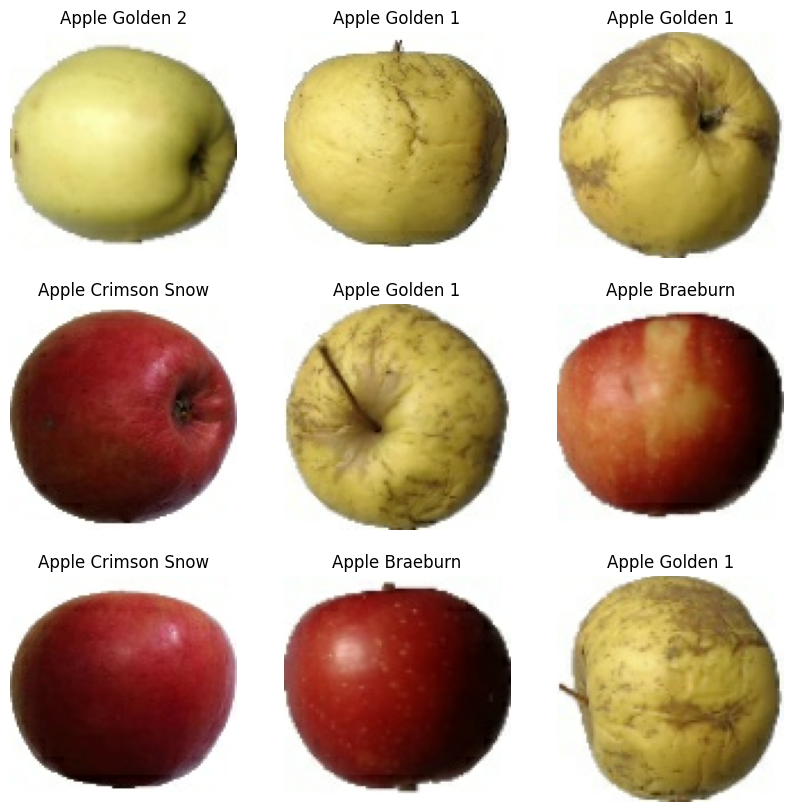

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    
    plt.axis("off")


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)


**Handling Overfitting**

To handle overfitting in our model, we implemented dropout, which randomly drops some neurons during training to reduce the model's reliance on any particular neuron. We set a dropout rate of 0.5 after the first Dense layer.

In [10]:
num_classes = len(class_names)

data_augmentation = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
])



model = Sequential([
  data_augmentation,
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])



In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)      

## Training the model

In [ ]:

epochs=7
callbacks = [
  tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True),
  tf.keras.callbacks.EarlyStopping(patience=3),
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callbacks
)


Epoch 1/7
47/47 [==============================] - 436s 4s/step - loss: 1.9300 - accuracy: 0.5499 - val_loss: 0.9074 - val_accuracy: 0.9189
Epoch 2/7
47/47 [==============================] - 43s 926ms/step - loss: 0.7419 - accuracy: 0.8908 - val_loss: 0.4419 - val_accuracy: 0.9973
Epoch 3/7
47/47 [==============================] - 45s 958ms/step - loss: 0.4165 - accuracy: 0.9811 - val_loss: 0.4496 - val_accuracy: 0.9486
Epoch 4/7
47/47 [==============================] - 42s 904ms/step - loss: 0.3629 - accuracy: 0.9784 - val_loss: 0.2756 - val_accuracy: 1.0000
Epoch 5/7
47/47 [==============================] - 43s 913ms/step - loss: 0.2683 - accuracy: 0.9966 - val_loss: 0.2388 - val_accuracy: 0.9973
Epoch 6/7
47/47 [==============================] - 43s 927ms/step - loss: 0.2808 - accuracy: 0.9825 - val_loss: 0.2170 - val_accuracy: 1.0000
Epoch 7/7
47/47 [==============================] - 43s 920ms/step - loss: 0.2132 - accuracy: 0.9960 - val_loss: 0.1897 - val_accuracy: 1.0000


In [1]:
import pickle
# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

NameError: ignored

# Training progress

The figure below shows how the training and validation accuracy and loss evolve over the epochs.

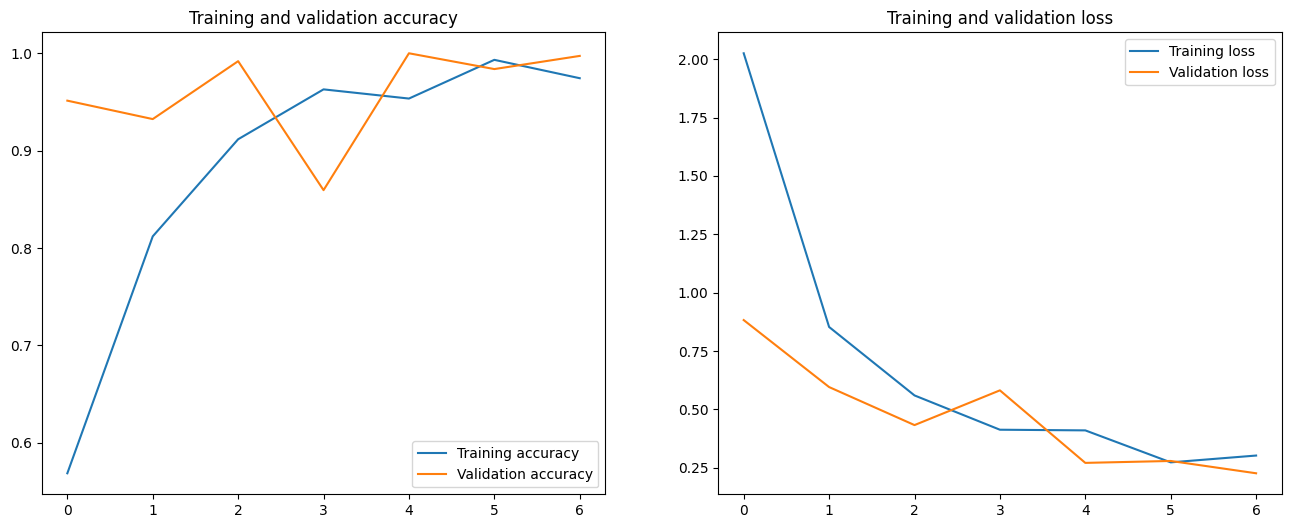

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()


## Testing the model



1/1 [==============================] - 0s 144ms/step
This image most likely is a Apple Golden 1 with a 68.85 percent confidence.


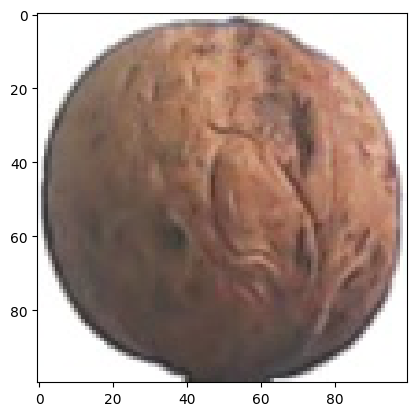

In [14]:
test_pic_url = "/content/drive/MyDrive/fruits-360_dataset/fruits-360/Test/Walnut/100_100.jpg"
img = tf.keras.utils.load_img(test_pic_url, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # create a batch
plt.imshow(img)

predictions_pic = model.predict(img_array)
score_pic = tf.nn.softmax(predictions_pic[0])
print(
    "This image most likely is a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_pic)], 100 * np.max(score_pic))
)

1/1 [==============================] - 0s 30ms/step
This image most likely is a Apple Golden 2 with a 79.44 percent confidence.


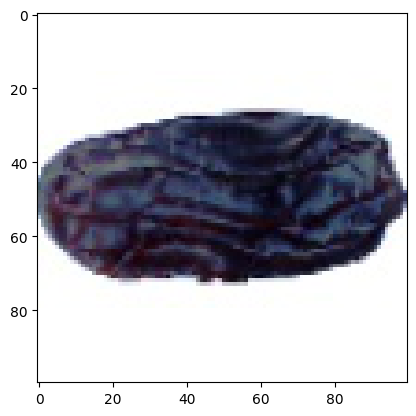

In [15]:
test_pic_url = "/content/drive/MyDrive/fruits-360_dataset/fruits-360/Test/Dates/100_100.jpg"

img = tf.keras.utils.load_img(test_pic_url, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # create a batch
plt.imshow(img)

predictions_pic = model.predict(img_array)
score_pic = tf.nn.softmax(predictions_pic[0])
print(
    "This image most likely is a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_pic)], 100 * np.max(score_pic))
)

1/1 [==============================] - 0s 31ms/step
This image most likely is a Apple Golden 1 with a 99.60 percent confidence.


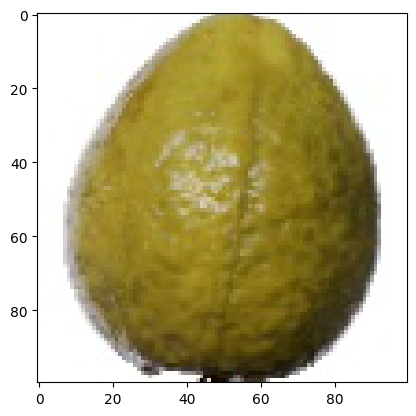

In [16]:
test_pic_url = "/content/drive/MyDrive/fruits-360_dataset/fruits-360/Test/Guava/103_100.jpg"
img = tf.keras.utils.load_img(test_pic_url, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # create a batch
plt.imshow(img)

predictions_pic = model.predict(img_array)
score_pic = tf.nn.softmax(predictions_pic[0])
print(
    "This image most likely is a {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_pic)], 100 * np.max(score_pic))
)

So far so good but let's look at the whole test set and look at the overall accuracy achieved on it.

In [17]:
test_url = "/content/drive/MyDrive/fruits-360_dataset/fruits-360/Test"

test_ds = tf.keras.utils.image_dataset_from_directory( 
    test_url, 
    seed = 123, 
    image_size=(img_height,img_width),
    shuffle=False, #No shuffling for classification report
    batch_size=batch_size
)
model.evaluate(test_ds)

Found 22754 files belonging to 131 classes.
712/712 [==============================] - 4136s 6s/step - loss: 21.6281 - accuracy: 0.0280


[21.628068923950195, 0.028039027005434036]

In [18]:
test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

712/712 [==============================] - 167s 234ms/step


Class wise accuracy shows us that certain classes are easier to identify than others for the NN. 

In [19]:
y_test = np.concatenate(test_labels) 
y_pred = np.array([np.argmax(s) for s in score])

print(classification_report(y_test, y_pred, target_names=class_names))

                     precision    recall  f1-score   support

     Apple Braeburn       0.03      1.00      0.05       164
 Apple Crimson Snow       0.03      1.00      0.05       148
     Apple Golden 1       0.03      1.00      0.05       166
     Apple Golden 2       0.03      0.95      0.06       168
     Apple Golden 3       0.00      0.00      0.00       161
 Apple Granny Smith       0.00      0.00      0.00       164
    Apple Pink Lady       0.00      0.00      0.00       152
        Apple Red 1       0.00      0.00      0.00       164
        Apple Red 2       0.00      0.00      0.00       164
        Apple Red 3       0.00      0.00      0.00       144
Apple Red Delicious       0.00      0.00      0.00       166
 Apple Red Yellow 1       0.00      0.00      0.00       164
 Apple Red Yellow 2       0.00      0.00      0.00       219
            Apricot       0.00      0.00      0.00       164
            Avocado       0.00      0.00      0.00       143
       Avocado ripe    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Confusin Matrix


In [20]:
# Get the true labels and predicted labels
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)



1/1 [==============================] - 0s 53ms/step


##Designing Confusion matrix for 20 classes


In [21]:
true_labels_20=[]
predicted_labels_20=[]
classes =[]
for i, (images, labels) in enumerate(test_ds):
    classes= class_names[i]
    true_labels_20.extend(labels.numpy())
    predictions_20 = model.predict(images)
    predicted_labels_20.extend(np.argmax(predictions_20, axis=1))
    
    # Break the loop after the first 20 items
    if i == 19:
        break
cm_20 = confusion_matrix(true_labels_20, predicted_labels_20)

1/1 [==============================] - 0s 177ms/step


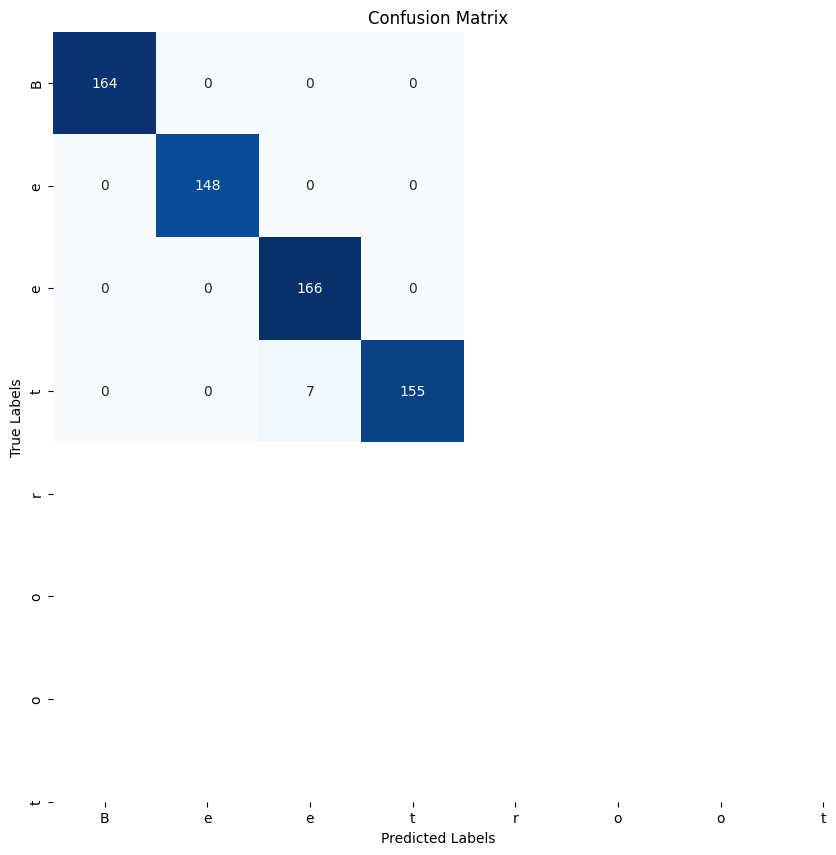

In [22]:

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_20, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [23]:
#Get a selection of images
image_batch, label_batch = next(iter(train_ds))
prediction_batch = model.predict(image_batch)
score_batch = tf.nn.softmax(prediction_batch)

1/1 [==============================] - 0s 361ms/step


Below are some test images with their actual class an their prediction.

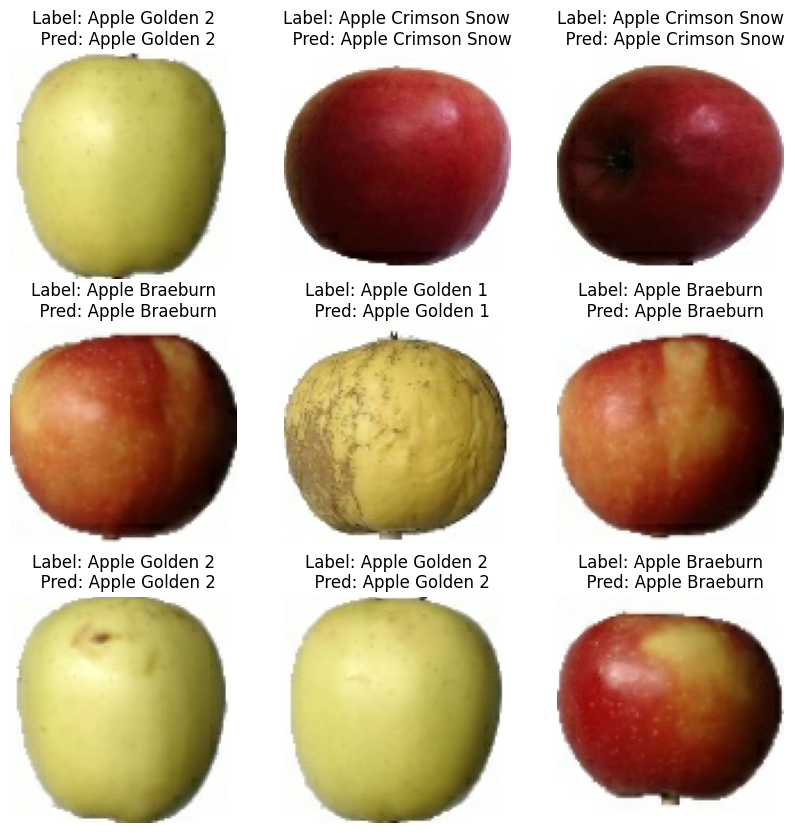

In [24]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title( "Label: " + class_names[label] + "\n  Pred: " + class_names[np.argmax(score_batch[i])])
  plt.axis("off")

# Summary

Fruits and vegetables images were classified using a CNN. The classifier has an average accuracy of roughly 98% when identifiying images of single fruits or vegetables. The identification for images taken under more realistic conditions, rather than the test set images which are very similar to the training set images, could be further improved using the full sized images rather than the 100x100 pixel version and applying further & larger data augmentation steps. Ideally one would also have some training data with various backgrounds.





